In [1]:
!git clone https://github.com/pshakhmin/deepfakes

Cloning into 'deepfakes'...
remote: Enumerating objects: 406, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (230/230), done.
remote: Total 406 (delta 38), reused 252 (delta 31), pack-reused 138
Receiving objects: 100% (406/406), 269.50 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (98/98), done.
Updating files: 100% (222/222), done.


In [2]:
!git clone https://github.com/lukemelas/pytorch-pretrained-gans.git
%cd pytorch-pretrained-gans

Cloning into 'pytorch-pretrained-gans'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (390/390), done.
remote: Compressing objects: 100% (269/269), done.
remote: Total 390 (delta 130), reused 357 (delta 97), pack-reused 0
Receiving objects: 100% (390/390), 4.22 MiB | 11.11 MiB/s, done.
Resolving deltas: 100% (130/130), done.
/content/pytorch-pretrained-gans


In [3]:
!apt-get -qq install -y pytorch_pretrained_gans

E: Unable to locate package pytorch_pretrained_gans


In [4]:
import torch
import sys

In [5]:
sys.path.append('/content/pytorch-pretrained-gans/')

In [6]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 13.4 MB/s eta 0:00:00


In [7]:
import torch
import cuda
import os

from torch import nn
from torch import optim
from torch.optim import lr_scheduler
from torchvision import transforms, datasets, models
from tqdm.notebook import tqdm
from torchvision.io import read_image
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision
import torch.optim as optim
from torchvision import models

from PIL import Image
from IPython.display import display
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from torchvision import datasets
from torchvision.utils import save_image
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torchvision.transforms import v2
from torchvision.datasets import ImageFolder

from pytorch_pretrained_gans import make_gan

import matplotlib.pyplot as plt
import numpy as np

import logging
import warnings

import os

from google.colab import drive
drive.mount('/content/drive')

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Mounted at /content/drive


In [8]:
stats = (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)

def denorm(img_tensors):
    return img_tensors * stats[1][0] + stats[0][0]

def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(denorm(images.detach()[:nmax]), nrow=8).permute(1, 2, 0))

def show_batch(dl, nmax=64):
    for images, _ in dl:
        show_images(images, nmax)
        break

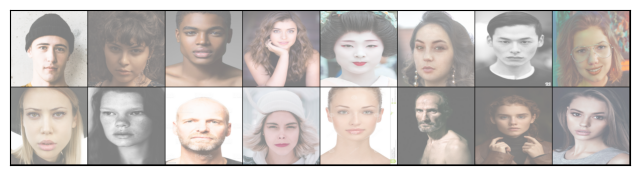

In [10]:
dataset_path = '/content/drive/MyDrive/курсовая 2 курс /bigDataset'
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
show_batch(dataloader)

In [11]:
G = make_gan(gan_type='selfconditionedgan', model_name='self_conditioned')  # -> nn.Module
y = G.sample_class(batch_size=1)  # -> torch.Size([1, 1000])
z = G.sample_latent(batch_size=1)  # -> torch.Size([1, 256])
x = G(z=z, y=y)  # -> torch.Size([1, 3, 128, 128])
assert z.shape == torch.Size([1, 256])
assert x.shape == torch.Size([1, 3, 128, 128])

# StyleGAN2 (unconditional)
G = make_gan(gan_type='stylegan2').to('cuda')  # -> nn.Module
z = G.sample_latent(batch_size=1, device='cuda')  # -> torch.Size([1, 18, 512])
x = G(z=z)  # -> torch.Size([1, 3, 1024, 1024])
assert z.shape == torch.Size([1, 18, 512])
assert x.shape == torch.Size([1, 3, 1024, 1024])

Downloading: "http://selfcondgan.csail.mit.edu/weights/selfcondgan_i_model.pt" to /root/.cache/torch/hub/checkpoints/selfcondgan_i_model.pt
100%|██████████| 1.10G/1.10G [00:16<00:00, 70.1MB/s]


Loaded pretrained GAN weights (iteration: 200000.0)
Added /content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch to path


Downloading: "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl" to /root/.cache/torch/hub/checkpoints/ffhq.pkl
100%|██████████| 364M/364M [00:12<00:00, 30.7MB/s]


Setting up PyTorch plugin "bias_act_plugin"... Failed!


/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/bias_act.py:50: UserWarning: Failed to build CUDA kernels for bias_act. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/bias_act.py", line 48, in _init
    _plugin = custom_ops.get_plugin('bias_act_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1309, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1719, in _jit_compile
    _write_ninja_f

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1309, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1719, in _jit_compile
    _write_nin

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1309, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1745, in _jit_compile
    return _im

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
  File "/content/pytorch-pretrained-gans/pytorch_pretrained_gans/stylegan2_ada_pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1309, in load
    return _jit_compile(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py", line 1745, in _jit_compile
    return _im

In [12]:
def load_trained_resnet(fp='/content/deepfakes/artifacts/resnet_09964_sd.pt'):
    """Loads a pretrained resnet34 for knowledge distillation"""
    resnet = models.resnet34(pretrained=True)
    resnet.fc = nn.Sequential(
        nn.Linear(resnet.fc.in_features, 1),
        nn.Sigmoid()
    )

    resnet.load_state_dict(torch.load(fp, map_location=device))

    resnet = resnet.to(device)
    return resnet

In [13]:
teacher_model = load_trained_resnet()
D = teacher_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 164MB/s]


In [14]:
optimizer_G = optim.Adam(G.parameters(), lr=0.0001, betas=(0.5, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=0.0001, betas=(0.5, 0.999))

adversarial_loss = nn.BCELoss()

In [15]:
warnings.filterwarnings("ignore", category=UserWarning, module='torch_utils')

In [16]:
def train_gan(generator, discriminator, optimizer_G, optimizer_D, dataloader, epochs=10):
    for epoch in range(epochs):
        epoch_d_loss = 0
        epoch_g_loss = 0

        with tqdm(total=len(dataloader), desc=f'Epoch {epoch+1}/{epochs}', unit='batch') as pbar:
            for i, (imgs, _) in enumerate(dataloader):
                valid = torch.ones((imgs.size(0), 1), requires_grad=False).to(device)
                fake = torch.zeros((imgs.size(0), 1), requires_grad=False).to(device)

                real_imgs = imgs.to(device)

                # Train Generator
                optimizer_G.zero_grad()
                z = generator.sample_latent(batch_size=imgs.size(0), device=device)
                gen_imgs = generator(z=z)
                g_loss = adversarial_loss(discriminator(gen_imgs), valid)
                g_loss.backward()
                optimizer_G.step()

                # Train Discriminator
                optimizer_D.zero_grad()
                real_loss = adversarial_loss(discriminator(real_imgs), valid)
                fake_loss = adversarial_loss(discriminator(gen_imgs.detach()), fake)
                d_loss = (real_loss + fake_loss) / 2
                d_loss.backward()
                optimizer_D.step()

                epoch_d_loss += d_loss.item()
                epoch_g_loss += g_loss.item()

                pbar.set_postfix(D_loss=d_loss.item(), G_loss=g_loss.item())
                pbar.update(1)

        # Save weights every 10 epochs
        if epoch % 10 == 0:
            torch.save(generator.state_dict(), f"generator_epoch_{epoch}.pth")
            torch.save(discriminator.state_dict(), f"discriminator_epoch_{epoch}.pth")

        print(f"[Epoch {epoch+1}/{epochs}] [D loss: {epoch_d_loss/len(dataloader)}] [G loss: {epoch_g_loss/len(dataloader)}]")

    # Save final model weights
    torch.save(generator.state_dict(), "generator_final.pth")
    torch.save(discriminator.state_dict(), "discriminator_final.pth")

In [17]:
train_gan(G, D, optimizer_G, optimizer_D, dataloader, epochs=10)

Epoch 1/2:   0%|          | 0/452 [00:00<?, ?batch/s]

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plu

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plu

Epoch 2/2:   0%|          | 0/452 [00:00<?, ?batch/s]

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plu

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plu

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plu

In [18]:
def show_tensor_images(image_tensor, num_images=10, size=(1, 28, 28)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and shows the images in a uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu().view(-1, *size)
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


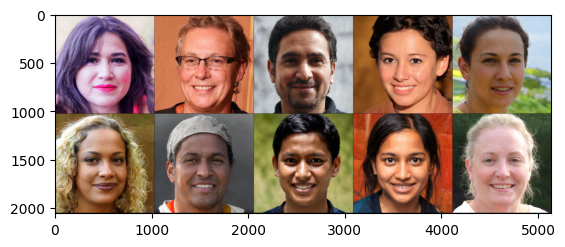

In [19]:
z = G.sample_latent(batch_size=10, device='cuda')  # Adjust device as necessary
x = G(z=z)  # Generated images
show_tensor_images(x, num_images=10, size=(3, 1024, 1024))

In [20]:
def validate_model(_model, _testloader):
    """Uses a dataloader to validate the model. Outputs model's accuracy on a given dataset"""
    _model.eval()
    class_correct = [0, 0]
    class_total = [0, 0]
    # classes = ['Real', 'Fake']
    _model.eval()
    with torch.no_grad():
        for data in tqdm(_testloader, leave=False, position=0):
            images, labels = data
            images = images.to(device)

            y_pred = _model(images)
            predicted = torch.squeeze(torch.round(y_pred))
            c = predicted.cpu().detach() == labels

            for i, label in enumerate(labels):
                class_correct[label] += c[i].item()
                class_total[label] += 1

    print(class_correct, class_total)
    _acc = sum(class_correct) / sum(class_total)
    return _acc

In [21]:
def distillation_loss(_student_output, _teacher_output, _t=2.0):
    """Loss function for knowledge distillation"""
    teacher_probs = torch.sigmoid(_teacher_output / _t)
    student_probs = torch.sigmoid(_student_output / _t)
    return nn.functional.mse_loss(student_probs, teacher_probs) * _t ** 2

In [22]:
val_dir = '/content/drive/MyDrive/курсовая 2 курс /DataSet_with_generated_fakes'
validation_dataloader = datasets.ImageFolder(val_dir, transform=transform)
valid_loader = torch.utils.data.DataLoader(validation_dataloader, batch_size = 64,
                                          shuffle=False, num_workers=2, drop_last = True)

In [27]:
optimizer = optim.Adam(D.parameters(), lr=0.000947829)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=580, gamma=0.10962742, verbose=False)
loss_fn = nn.BCEWithLogitsLoss()

accs = []

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


In [28]:
for epoch in tqdm(range(2), leave=False):
    D.eval()
    acc = validate_model(D, valid_loader)
    accs.append(acc)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[1000, 26] [1000, 7192]


  0%|          | 0/128 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


[1000, 26] [1000, 7192]


Лучшая accuracy для подходов: 12.52


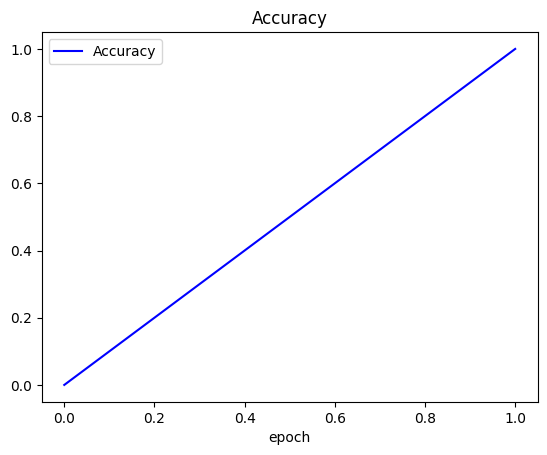

In [25]:
plt.plot(np.arange(len(accs)), color='blue', label='Accuracy')
print(f"Лучшая accuracy для подходов: {(max(accs) * 100):.2f}")

plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend()
plt.show()

In [26]:
print(accs)

[0.125244140625, 0.125244140625]
